<a href="https://colab.research.google.com/github/Legendary-Nerd/Crop-Recommendation/blob/main/Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crop Recommendation**

This dataset is structured to predict the most suitable crop to grow based on several agro-climatic parameters.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("madhuraatmarambhagat/crop-recommendation-dataset")

print("Path to dataset files:", path)

100%|██████████| 63.7k/63.7k [00:00<00:00, 23.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/madhuraatmarambhagat/crop-recommendation-dataset/versions/1


In [3]:
import os
os.listdir(path)

['Crop_recommendation.csv']

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv(path+"/Crop_recommendation.csv")
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df.shape

(2200, 8)

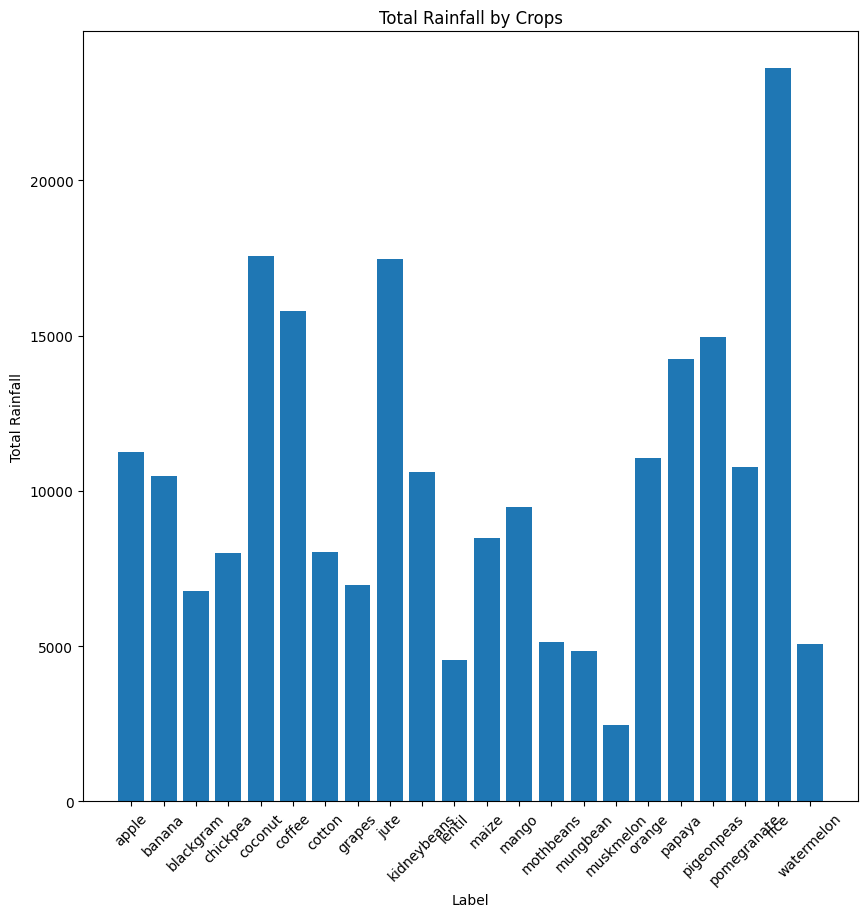

In [22]:
import matplotlib.pyplot as plt

# Group and aggregate
rainfall_by_label = df.groupby('label')['rainfall'].sum()

# Plot
plt.figure(figsize=(10, 10))
plt.bar(rainfall_by_label.index, rainfall_by_label.values)
plt.xlabel('Label')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall by Crops')
plt.xticks(rotation=45)
plt.show()


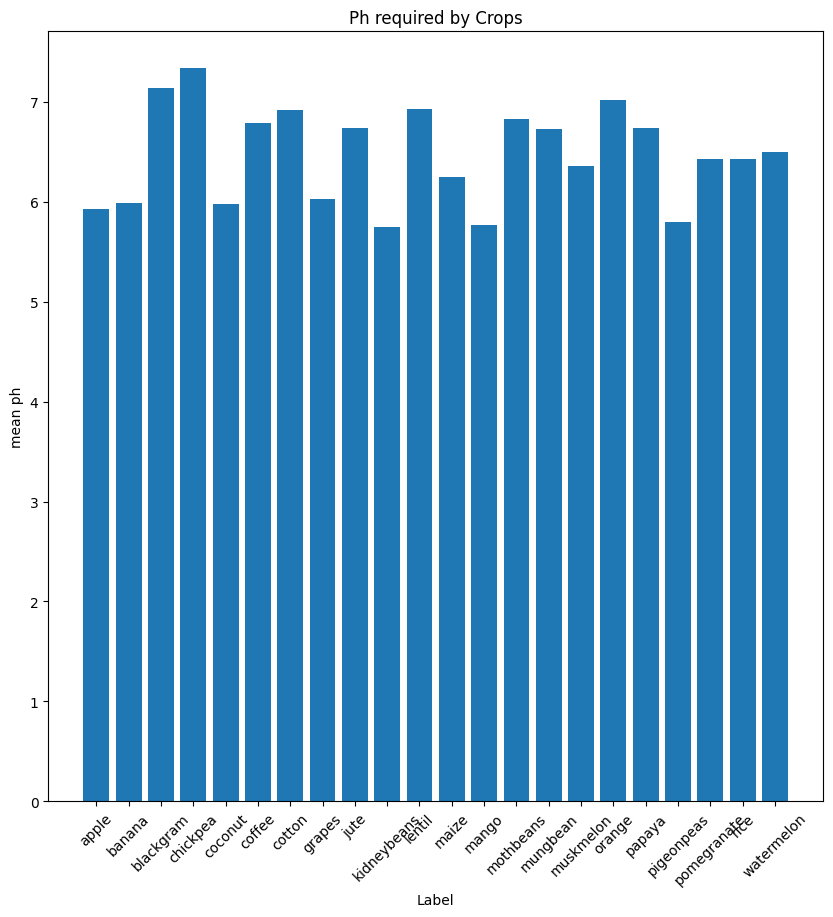

In [31]:

# Group and aggregate
ph_by_label = df.groupby('label')['ph'].mean()

# Plot
plt.figure(figsize=(10, 10))
plt.bar(ph_by_label.index, ph_by_label.values )
plt.xlabel('Label')
plt.ylabel('mean ph')
plt.title('Ph required by Crops')
plt.xticks(rotation=45)
plt.show()


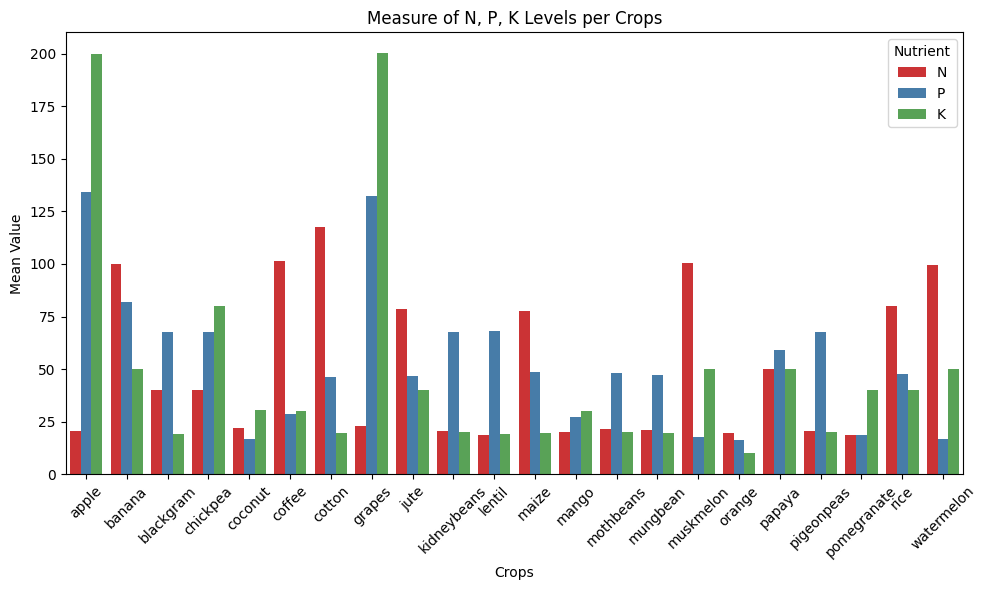

In [27]:
group_npk = df.groupby("label")[["N", "P", "K"]].mean().reset_index()
melted = group_npk.melt(id_vars="label", value_vars=["N", "P", "K"],var_name="Nutrient", value_name="Mean Value")

plt.figure(figsize=(10,6))
sns.barplot(x="label", y="Mean Value", hue="Nutrient", data=melted, palette="Set1")
plt.title("Measure of N, P, K Levels per Crops")
plt.ylabel("Mean Value")
plt.xlabel("Crops")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

here we can say that mean ph values for the different crops and muskmelon need less water and rice need the max rain

In [11]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size=0.2)

## **RandomForest**

In [12]:
re = RandomForestClassifier(n_estimators=10,max_depth=7,random_state=42)
re.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=10, random_state=42)

In [14]:
y_pred = re.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.9681818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        83
      banana       1.00      1.00      1.00        79
   blackgram       0.95      0.94      0.94        82
    chickpea       1.00      1.00      1.00        82
     coconut       0.99      1.00      0.99        80
      coffee       0.93      1.00      0.96        79
      cotton       0.92      1.00      0.96        78
      grapes       1.00      1.00      1.00        81
        jute       0.82      0.91      0.86        75
 kidneybeans       1.00      0.98      0.99        84
      lentil       0.97      0.92      0.95        78
       maize       0.99      0.91      0.95        81
       mango       0.93      0.99      0.95        75
   mothbeans       0.89      0.89      0.89        85
    mungbean       1.00      1.00      1.00        75
   muskmelon       1.00      1.00      1.00        81
      orange       1.00      0.99      0.99   

## **SVM**

In [16]:
from sklearn.svm import SVC

sc =SVC(kernel='linear')
sc.fit(x_train,y_train)

SVC(kernel='linear')

In [17]:
y_pred = sc.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        83
      banana       1.00      1.00      1.00        79
   blackgram       0.95      0.99      0.97        82
    chickpea       1.00      1.00      1.00        82
     coconut       1.00      1.00      1.00        80
      coffee       0.97      0.97      0.97        79
      cotton       0.97      1.00      0.99        78
      grapes       1.00      1.00      1.00        81
        jute       0.79      0.88      0.83        75
 kidneybeans       0.99      1.00      0.99        84
      lentil       0.94      0.96      0.95        78
       maize       1.00      0.96      0.98        81
       mango       0.97      1.00      0.99        75
   mothbeans       0.97      0.92      0.95        85
    mungbean       1.00      1.00      1.00        75
   muskmelon       1.00      1.00      1.00        81
      orange       1.00      1.00      1.00        78
     

we see svm have more accuracy of prediction the crop needed for the given conditions

In [25]:
# model downloaded
import joblib

joblib.dump(sc,"model.pkl")

['model.pkl']

In [32]:
model = joblib.load("model.pkl")
model.predict([[90,42,43,20.87974371,82.00274423,6.502985292000001,143.0]])
#predict value


array(['jute'], dtype=object)